# BMI analysis

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shutil
import itertools

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"
plot_manuscript = "../manuscript/plots/"

def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))

# Define parameters

In [60]:
# scenarios genes + vertical transmission
d = {'random-mating' :  [0.10, .25, 0.5, 0.75, 0.90],
    'genes' : [0.0, 0.05, 0.10, 0.20],
    'vertical-trans' : [0.0, 0.05, 0.25, 0.50]}

df = pd.DataFrame(product_dict(**d))
df['iteration'] = df.groupby(list(d)).ngroup()
df = df.loc[df.index.repeat(100)]
vars = ['iteration', 'random-mating', 'genes', 'vertical-trans']
df.loc[:,vars].to_csv(model_path + "data/param-bmi-mating-genes-vertical-trans.csv", index=False)
df.loc[:,vars].shape

(8000, 4)

# Genes + Vertical transmission + Mating

In [27]:
vars = ['iteration', 'p_genetic_variance', 'p_vertical_trans_variance', 
    'p_random_mating', 'p_fertility_factor']
df = pd.read_csv(output_path + "results-bmi-mating-genes-vertical-trans.csv", sep = ";")
params = pd.read_csv(output_path + "param-bmi-mating-genes-vertical-trans.csv", sep = ";")
params = params. drop_duplicates(subset=vars)

cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
df = df.merge(params, on = ["iteration"])
df['p_comb'] = 'G = ' + df['p_genetic_variance'].map(str)  + ', VT = ' + df['p_vertical_trans_variance'].map(str)

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_49308/2664135294.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [28]:
params.shape

(80, 11)

In [29]:
df.shape

(8000, 28)

[0.1, 0.0, 0.2, 0.05]


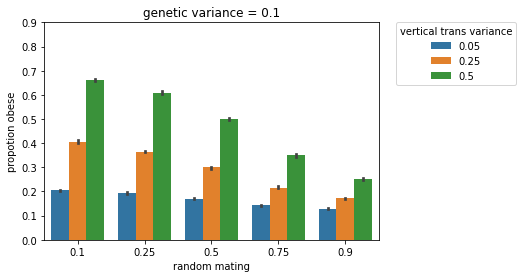

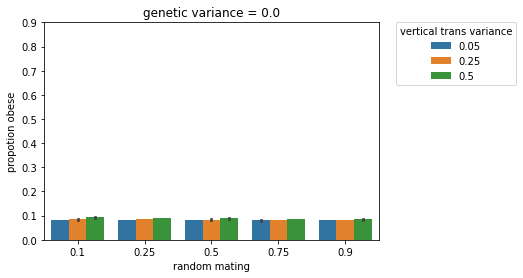

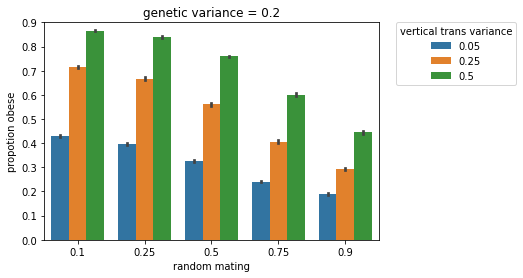

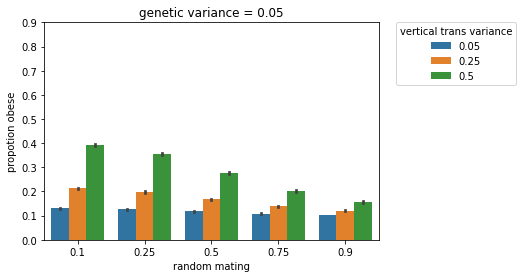

In [30]:
s = df.loc[df.p_vertical_trans_variance != 0].copy()
v = list(s.p_genetic_variance.unique())
print(v)
for i in v:
    p = sns.barplot(y='g4', x='p_random_mating', hue='p_vertical_trans_variance',
    data=s[s.p_genetic_variance==i], estimator=np.median);
    p.set_ylabel("propotion obese", fontsize = 10)
    p.set_xlabel("random mating", fontsize = 10)
    p.set(title ="genetic variance = " + str(i))
    p.set_ylim(0, 0.9)
    plt.legend(title='vertical trans variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(plots_path + "prop-bmi-mating-vertical-trans-genes-" + str(i).replace('.', '-') + ".pdf", bbox_inches='tight')
    shutil.copy(plots_path + "prop-bmi-mating-vertical-trans-genes-" + str(i).replace('.', '-') + ".pdf", plot_manuscript)
    plt.show()

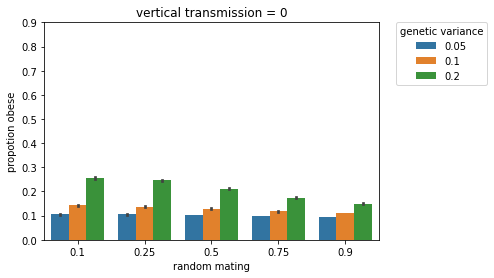

In [31]:
# vertical transmission = 0
s = df.loc[(df.p_vertical_trans_variance == 0) & (df.p_genetic_variance>0)].copy()
p = sns.barplot(y='g4', x='p_random_mating', hue='p_genetic_variance',
data=s, estimator=np.median);
p.set_ylabel("propotion obese", fontsize = 10)
p.set_xlabel("random mating", fontsize = 10)
p.set(title ="vertical transmission = " + str(0))
p.set_ylim(0, 0.9)
plt.legend(title='genetic variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "prop-bmi-mating-genes-vertical-trans-" + str(0) + ".pdf", bbox_inches='tight')
shutil.copy(plots_path + "prop-bmi-mating-genes-vertical-trans-" + str(0) + ".pdf", plot_manuscript)
plt.show()

# Genes + Vertical transmission + Fertiliy

In [3]:
# scenarios genes + vertical transmission
d = {'fertility' :  [0.0, .10, 0.20, 0.30],
    'genes' : [0.0, 0.05, 0.10, 0.20],
    'vertical-trans' : [0.0, 0.05, 0.25, 0.50]}

df = pd.DataFrame(product_dict(**d))
df['iteration'] = df.groupby(list(d)).ngroup()
df = df.loc[df.index.repeat(100)]
vars = ['iteration', 'fertility', 'genes', 'vertical-trans']
df.loc[:,vars].to_csv(model_path + "data/param-bmi-fertility-genes-vertical-trans.csv", index=False)
df.loc[:,vars].shape

(6400, 4)

In [11]:
vars = ['iteration', 'p_genetic_variance', 'p_vertical_trans_variance', 
    'p_random_mating', 'p_fertility_factor']
df = pd.read_csv(output_path + "results-bmi-fertility-genes-vertical-trans.csv", sep = ";")
params = pd.read_csv(output_path + "param-bmi-fertility-genes-vertical-trans.csv", sep = ";")
params = params. drop_duplicates(subset=vars)

cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
df = df.merge(params, on = ["iteration"])
df['p_comb'] = 'G = ' + df['p_genetic_variance'].map(str)  + ', VT = ' + df['p_vertical_trans_variance'].map(str)

/var/folders/36/wsfqn0_j2ng6r0b58wc559fc0000gn/T/ipykernel_49308/487040513.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


[0.1, 0.0, 0.2, 0.05]


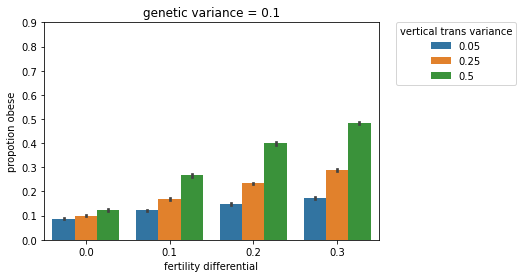

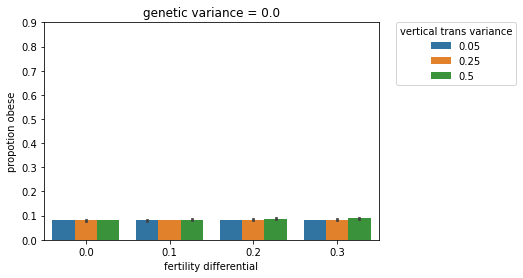

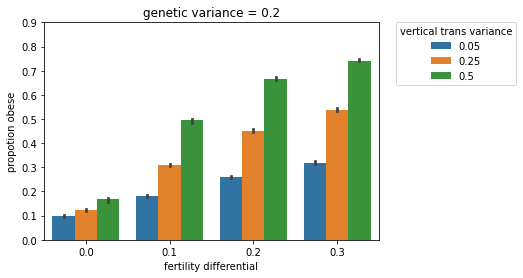

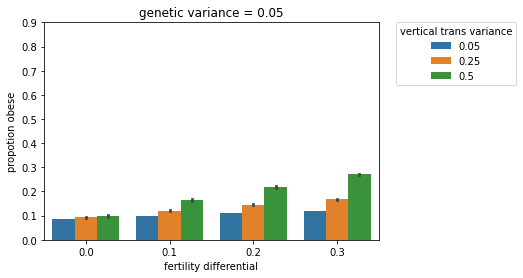

In [14]:
s = df.loc[df.p_vertical_trans_variance != 0].copy()
v = list(s.p_genetic_variance.unique())
print(v)
for i in v:
    p = sns.barplot(y='g4', x='p_fertility_factor', hue='p_vertical_trans_variance',
    data=s[s.p_genetic_variance==i], estimator=np.median);
    p.set_ylabel("propotion obese", fontsize = 10)
    p.set_xlabel("fertility differential", fontsize = 10)
    p.set(title ="genetic variance = " + str(i))
    p.set_ylim(0, 0.9)
    plt.legend(title='vertical trans variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.savefig(plots_path + "prop-bmi-fertility-vertical-trans-genes-" + str(i).replace('.', '-') + ".pdf", bbox_inches='tight')
    shutil.copy(plots_path + "prop-bmi-fertility-vertical-trans-genes-" + str(i).replace('.', '-') + ".pdf", plot_manuscript)
    plt.show()

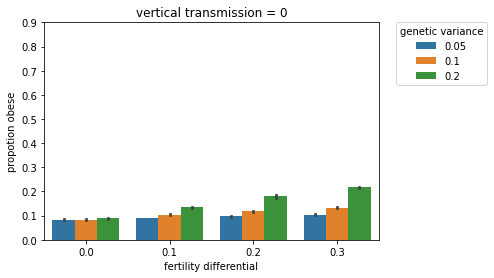

In [15]:
# vertical transmission = 0
s = df.loc[(df.p_vertical_trans_variance==0) & (df.p_genetic_variance>0)].copy()
p = sns.barplot(y='g4', x='p_fertility_factor', hue='p_genetic_variance',
data=s, estimator=np.median);
p.set_ylabel("propotion obese", fontsize = 10)
p.set_xlabel("fertility differential", fontsize = 10)
p.set(title ="vertical transmission = " + str(0))
p.set_ylim(0, 0.9)
plt.legend(title='genetic variance', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(plots_path + "prop-bmi-fertility-genes-vertical-trans-" + str(0) + ".pdf", bbox_inches='tight')
shutil.copy(plots_path + "prop-bmi-fertility-genes-vertical-trans-" + str(0) + ".pdf", plot_manuscript)
plt.show()